## Data Exploration / Cleaning

In [1]:
import pandas as pd

# ============================
# 1. Load datasets
# ============================
train_df = pd.read_csv("../data/raw/train.csv")
eval_df = pd.read_csv("../data/raw/eval.csv")
metros = pd.read_csv("../data/raw/usmetros.csv")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

In [ ]:
print(train_df.shape)
print(eval_df.shape)

(215281, 39)
(54960, 39)


In [3]:
train_df['city_full'].value_counts().head()

city_full
Chicago-Naperville-Elgin       35344
DC_Metro                       29516
Boston-Cambridge-Newton        25568
Dallas-Fort Worth-Arlington    23594
Detroit-Warren-Dearborn        20022
Name: count, dtype: int64

### Map cities to Lat/Long
- The goal is to use Lattitude and longitude instead of cities for our ML models

In [4]:
# ============================
# 2. Fix city name mismatches
# ============================
city_mapping = {
    'Las Vegas-Henderson-Paradise': 'Las Vegas-Henderson-North Las Vegas',
    'Denver-Aurora-Lakewood': 'Denver-Aurora-Centennial',
    'Houston-The Woodlands-Sugar Land': 'Houston-Pasadena-The Woodlands',
    'Austin-Round Rock-Georgetown': 'Austin-Round Rock-San Marcos',
    'Miami-Fort Lauderdale-Pompano Beach': 'Miami-Fort Lauderdale-West Palm Beach',
    'San Francisco-Oakland-Berkeley': 'San Francisco-Oakland-Fremont',
    'DC_Metro': 'Washington-Arlington-Alexandria',
    'Atlanta-Sandy Springs-Alpharetta': 'Atlanta-Sandy Springs-Roswell'
}

In [5]:
def clean_and_merge(df: pd.DataFrame) -> pd.DataFrame:
    """Apply city name fixes, merge lat/lng from metros, drop dup col."""
    df["city_full"] = df["city_full"].replace(city_mapping)
    
    df = df.merge(
        metros[["metro_full", "lat", "lng"]],
        how="left",
        left_on="city_full",
        right_on="metro_full"
    )
    df.drop(columns=["metro_full"], inplace=True)

    # Log any cities that still didn’t match
    missing = df[df["lat"].isnull()]["city_full"].unique()
    if len(missing) > 0:
        print("⚠️ Still missing lat/lng for:", missing)
    else:
        print("✅ All cities matched with metros dataset.")

    return df


In [6]:
# ============================
# 3. Apply cleaning + merge to both train and eval
# ============================
train_df = clean_and_merge(train_df)
eval_df = clean_and_merge(eval_df)

⚠️ Still missing lat/lng for: <StringArray>
[  'Atlanta-Sandy Springs-Roswell',     'Dallas-Fort Worth-Arlington',
 'Washington-Arlington-Alexandria',      'Charlotte-Concord-Gastonia',
                      'Cincinnati',        'Denver-Aurora-Centennial',
         'Detroit-Warren-Dearborn',         'Boston-Cambridge-Newton',
       'Baltimore-Columbia-Towson',    'Austin-Round Rock-San Marcos',
        'Chicago-Naperville-Elgin',  'Houston-Pasadena-The Woodlands',
                               nan]
Length: 13, dtype: str
⚠️ Still missing lat/lng for: <StringArray>
[        'Detroit-Warren-Dearborn',        'Chicago-Naperville-Elgin',
                      'Cincinnati', 'Washington-Arlington-Alexandria',
       'Baltimore-Columbia-Towson',   'Atlanta-Sandy Springs-Roswell',
         'Boston-Cambridge-Newton',     'Dallas-Fort Worth-Arlington',
  'Houston-Pasadena-The Woodlands',        'Denver-Aurora-Centennial',
    'Austin-Round Rock-San Marcos',      'Charlotte-Concord-Gastonia']
L

In [7]:
print(train_df.shape)
print(eval_df.shape)

(215281, 41)
(54960, 41)


In [8]:
train_df.head(3)

date  median_sale_price  median_list_price  median_ppsf  \
0  2012-03-31            46550.0           217450.0    31.813674   
1  2012-03-31            57250.0           161700.0    41.606105   
2  2012-03-31           185000.0           218500.0    66.939891   

   median_list_ppsf  homes_sold  pending_sales  new_listings  inventory  \
0        110.183666        14.0           23.0          44.0       64.0   
1         61.887391         6.0            7.0           2.0       14.0   
2         84.806231       122.0          219.0         293.0      416.0   

   median_dom  avg_sale_to_list  sold_above_list  off_market_in_two_weeks  \
0        59.5          0.943662         0.142857                 0.043478   
1       218.0          0.815475         0.166667                 0.000000   
2        92.0          0.967185         0.221311                 0.077626   

  city  zipcode    year  bank  bus  hospital  mall  park  restaurant  school  \
0  ATL  30002.0  2012.0  12.0  2.0       4.0   1.0  60.0        45.0    57.0   
1  DAL  75423.0  2012.0   0.0  0.0       0.0   0.0   0.0         0.0     2.0   
2  ATL  30115.0  2012.0   0.0  0.0       0.0   0.0   4.0         1.0     4.0   

   station  supermarket  Total Population  Median Age  Per Capita Income  \
0      4.0          7.0            5811.0        36.3            33052.0   
1      0.0          0.0            3077.0        35.6            21900.0   
2      0.0          1.0           36851.0        35.5            30608.0   

   Total Families Below Poverty  Total Housing Units  Median Rent  \
0                        5811.0               2677.0        710.0   
1                        3077.0               1235.0        783.0   
2                       36536.0              13311.0        976.0   

   Median Home Value  Total Labor Force  Unemployed Population  \
0           279500.0             3171.0                  460.0   
1            93600.0             1497.0                  190.0   
2           230700.0            19240.0                 1059.0   

   Total School Age Population  Total School Enrollment  Median Commute Time  \
0                       5408.0                   5408.0               2492.0   
1                       2949.0                   2949.0               1152.0   
2                      35151.0                  35151.0              15846.0   

           price                      city_full  lat  lng  
0  200773.999557  Atlanta-Sandy Springs-Roswell  NaN  NaN  
1  109809.176444    Dallas-Fort Worth-Arlington  NaN  NaN  
2  193080.180695  Atlanta-Sandy Springs-Roswell  NaN  NaN

## clean Duplicates

In [9]:
print(train_df.shape)


duplicated_rows = train_df[train_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = train_df[train_df.duplicated(subset=train_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(215281, 41)
duplicated_rows: 0
duplicated_rows excluding date column: 1537


In [10]:
# Delete duplicates
train_df = train_df.drop_duplicates(subset=train_df.columns.difference(['date', 'year']), keep=False)

print(train_df.shape)

duplicated_rows = train_df[train_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = train_df[train_df.duplicated(subset=train_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(213245, 41)
duplicated_rows: 0
duplicated_rows excluding date column: 0


In [11]:
print(eval_df.shape)


duplicated_rows = eval_df[eval_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = eval_df[eval_df.duplicated(subset=eval_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(54960, 41)
duplicated_rows: 0
duplicated_rows excluding date column: 233


In [12]:
# Delete duplicates
eval_df = eval_df.drop_duplicates(subset=eval_df.columns.difference(['date', 'year']), keep=False)

print(eval_df.shape)


duplicated_rows = eval_df[eval_df.duplicated()].shape[0]
print("duplicated_rows:", duplicated_rows)

duplicated_rows = eval_df[eval_df.duplicated(subset=eval_df.columns.difference(['date', 'year']))].shape[0]
print("duplicated_rows excluding date column:", duplicated_rows)

(54647, 41)
duplicated_rows: 0
duplicated_rows excluding date column: 0


## clean outliers

In [13]:
train_df['median_list_price'].describe()

count    2.132450e+05
mean     3.116629e+05
std      3.761605e+06
min      0.000000e+00
25%      1.569500e+05
50%      2.493220e+05
75%      3.749500e+05
max      1.000000e+09
Name: median_list_price, dtype: float64

In [14]:
import plotly.express as px

fig = px.violin(train_df, y="median_list_price", box=True, hover_name="median_list_price")
fig.update_layout(title="Violin Plot of Median List Price")
fig.show()

In [15]:
top_1_percent = train_df.nlargest(int(0.01 * len(train_df)), 'median_list_price')
print(top_1_percent.shape)
top_1_percent.head(10)

(2132, 41)


date  median_sale_price  median_list_price  median_ppsf  \
99335   2015-10-31           439000.0        999999999.0   218.867925   
102764  2015-11-30           425000.0        999999999.0   220.055710   
104079  2015-12-31           439444.0        999999999.0   217.479377   
116141  2016-05-31           270000.0         50449949.5   232.758621   
116880  2016-06-30           415000.0         50449949.5   257.508343   
120592  2016-07-31           270000.0         50449949.5   232.758621   
178499  2018-08-31           502500.0         10000000.0   283.964706   
180883  2018-09-30           615000.0         10000000.0   259.710234   
154728  2017-10-31           250000.0          9999998.0   181.686047   
24135   2013-01-31           387000.0          8000000.0   258.000000   

        median_list_ppsf  homes_sold  pending_sales  new_listings  inventory  \
99335         236.391156       243.0          269.0         671.0      259.0   
102764        236.634569       241.0          284.0         616.0      196.0   
104079        231.798505       254.0          255.0         536.0      136.0   
116141       4156.568441         1.0            1.0           2.0        2.0   
116880       4156.568441         2.0            2.0           2.0        2.0   
120592       4156.568441         3.0            3.0           2.0        2.0   
178499       2131.226587         4.0            3.0           3.0        8.0   
180883       1012.453174         3.0            1.0           3.0        9.0   
154728        809.978779         1.0            2.0           3.0        1.0   
24135        2480.462909         5.0            5.0           3.0       15.0   

        median_dom  avg_sale_to_list  sold_above_list  \
99335         46.0          0.980975         0.160494   
102764        47.0          0.979123         0.132780   
104079        53.0          0.976354         0.137795   
116141       264.0          1.000000         0.000000   
116880       324.5          1.000447         0.500000   
120592       264.0          0.973591         0.333333   
178499        69.5          0.884475         0.000000   
180883       100.0          0.879300         0.000000   
154728        11.0          1.000000         0.000000   
24135         31.0          0.977039         0.000000   

        off_market_in_two_weeks city  zipcode    year  bank  bus  hospital  \
99335                  0.130112   DC  20878.0  2015.0   9.0  0.0       4.0   
102764                 0.133803   DC  20878.0  2015.0   9.0  0.0       4.0   
104079                 0.109804   DC  20878.0  2015.0   9.0  0.0       4.0   
116141                 0.000000   DC  20838.0  2016.0   0.0  0.0       0.0   
116880                 0.000000   DC  20838.0  2016.0   0.0  0.0       0.0   
120592                 0.000000   DC  20838.0  2016.0   0.0  0.0       0.0   
178499                 0.000000   DC  20184.0  2018.0   0.0  0.0       0.0   
180883                 0.000000   DC  20184.0  2018.0   0.0  0.0       0.0   
154728                 1.000000   DC  20838.0  2017.0   0.0  0.0       0.0   
24135                  0.000000   DC  22640.0  2013.0   0.0  0.0       0.0   

        mall   park  restaurant  school  station  supermarket  \
99335    1.0  110.0        59.0    50.0      2.0         11.0   
102764   1.0  110.0        59.0    50.0      2.0         11.0   
104079   1.0  110.0        59.0    50.0      2.0         11.0   
116141   0.0   11.0         1.0     4.0      2.0          0.0   
116880   0.0   11.0         1.0     4.0      2.0          0.0   
120592   0.0   11.0         1.0     4.0      2.0          0.0   
178499   0.0    3.0         0.0     0.0      0.0          0.0   
180883   0.0    3.0         0.0     0.0      0.0          0.0   
154728   0.0   11.0         1.0     4.0      2.0          0.0   
24135    0.0    0.0         0.0     6.0      0.0          0.0   

        Total Population  Median Age  Per Capita Income  \
99335            63855.0        38.1            52955.0   
102764  

In [16]:
top_1_percent = train_df.nlargest(int(0.01 * len(train_df)), 'median_list_price')
print(top_1_percent['median_list_price'].value_counts().sort_index(ascending=False))

median_list_price
999999999.0     3
50449949.5      3
10000000.0      2
9999998.0       1
8000000.0       3
6000000.0       4
5900000.0       2
5875000.0       1
5500000.0       1
5492500.0       1
5400000.0       2
5362449.5       1
5350000.0       9
5300000.0       1
4900000.0       2
4500000.0       3
4200000.0       2
3995000.0       1
3850000.0       1
3695000.0      21
3599000.0       1
3500000.0       5
3400000.0       1
3347500.0       1
3300000.0       4
3299500.0       1
3224500.0       1
3157500.0       1
3152500.0       1
3100000.0       1
3097500.0       1
3075000.0       2
3050000.0       1
3022500.0       2
2999000.0       1
2950000.0       1
2924500.0       1
2875000.0       1
2850000.0       6
2845000.0       2
2824500.0       2
2750000.0       6
2749000.0       1
2747500.0       1
2745000.0       1
2742450.0       1
2725000.0       1
2717000.0       1
2700000.0       6
2695000.0       1
2662500.0       1
2650000.0       2
2630000.0       2
2585000.0       1
2575000.0 

- Investigate if median_list_price outliers are independent in distinct regions (for example if DC has different median_list_price)
- Drop outliers to keep things realistic and clean

In [17]:
# Clean outliers above 19M in both train and eval
train_df = train_df[train_df['median_list_price'] <= 19_000_000].copy()
eval_df = eval_df[eval_df['median_list_price'] <= 19_000_000].copy()

In [18]:
import plotly.express as px

fig = px.violin(train_df, y="median_list_price", box=True, hover_name="median_list_price")
fig.update_layout(title="Violin Plot of Median List Price")
fig.show()

In [19]:
top_1_percent = train_df.nlargest(int(0.01 * len(train_df)), 'median_list_price')
print(top_1_percent['median_list_price'].value_counts().sort_index(ascending=False))

median_list_price
10000000.0     2
9999998.0      1
8000000.0      3
6000000.0      4
5900000.0      2
5875000.0      1
5500000.0      1
5492500.0      1
5400000.0      2
5362449.5      1
5350000.0      9
5300000.0      1
4900000.0      2
4500000.0      3
4200000.0      2
3995000.0      1
3850000.0      1
3695000.0     21
3599000.0      1
3500000.0      5
3400000.0      1
3347500.0      1
3300000.0      4
3299500.0      1
3224500.0      1
3157500.0      1
3152500.0      1
3100000.0      1
3097500.0      1
3075000.0      2
3050000.0      1
3022500.0      2
2999000.0      1
2950000.0      1
2924500.0      1
2875000.0      1
2850000.0      6
2845000.0      2
2824500.0      2
2750000.0      6
2749000.0      1
2747500.0      1
2745000.0      1
2742450.0      1
2725000.0      1
2717000.0      1
2700000.0      6
2695000.0      1
2662500.0      1
2650000.0      2
2630000.0      2
2585000.0      1
2575000.0      5
2570000.0      1
2550000.0      3
2547500.0      1
2547000.0      1
2507500.0    

In [20]:
# ============================
# 4. Save cleaned datasets
# ============================
train_df.to_csv("../data/raw/processed/cleaning_train.csv", index=False)
eval_df.to_csv("../data/raw/processed/cleaning_eval.csv", index=False)

print("✅ Cleaning complete.")

✅ Cleaning complete.


## Housing prices exploration

In [21]:
df = train_df

/tmp/ipykernel_10258/1748330476.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




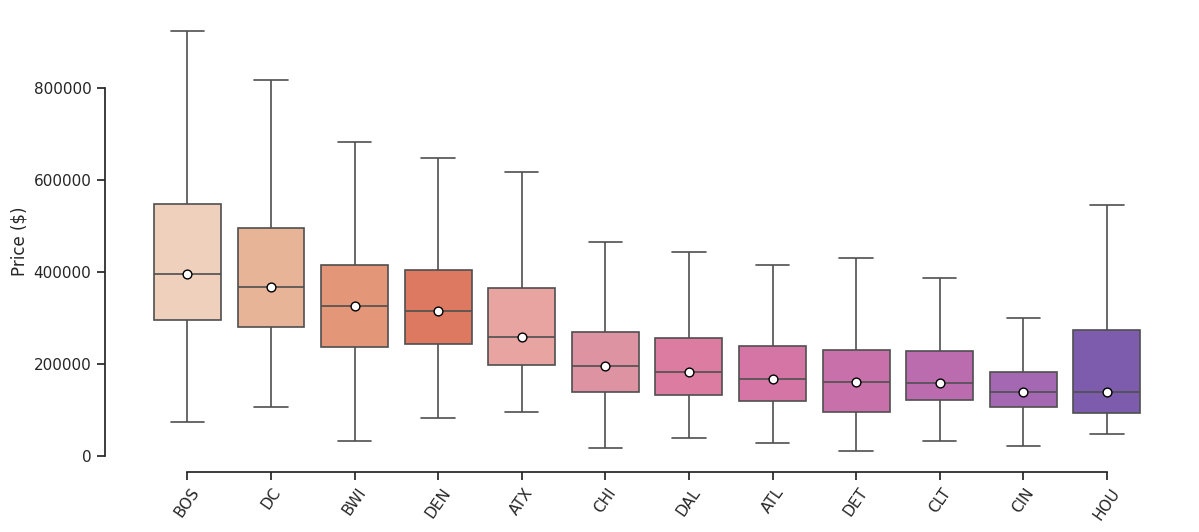

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
sns.set_theme(style="whitegrid")           

# Boxplot of house prices for the cities, ordered by median price.

top_cities = df["city"].value_counts().head(30).index.tolist()
df_city    = df[df["city"].isin(top_cities)]
city_order = (
    df_city.groupby("city")["price"]
           .median()
           .sort_values(ascending=False)
           .index
)

base = sns.color_palette("rocket_r", len(city_order))

def lighten(color, amt=.4):
    h, l, s = colorsys.rgb_to_hls(*color)
    return colorsys.hls_to_rgb(h, min(1, l + amt*(1-l)), s)

palette = [
    lighten(c, .45) if i >= len(base) - 8 else c
    for i, c in enumerate(base)
]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(
    x="city", y="price", data=df_city,
    order=city_order, palette=palette,
    showfliers=False, linewidth=1.2, ax=ax
)

medians = df_city.groupby("city")["price"].median().loc[city_order]
for tick, median in enumerate(medians):
    ax.scatter(tick, median, color="white", edgecolor="black", zorder=5, s=40)

ax.set_xlabel("")
ax.set_ylabel("Price ($)")
ax.tick_params(axis="x", rotation=55)
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="y", style="plain")

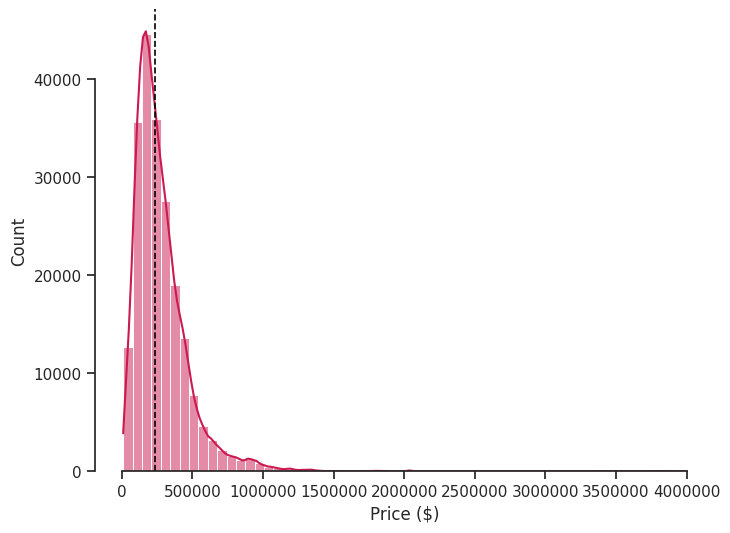

In [23]:
# Distribution of house prices across the dataset 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df["price"].dropna(), bins=60, kde=True, color=sns.color_palette("rocket_r", 1)[0], ax=ax)
median_price = df["price"].median()
ax.axvline(median_price, ls="--", lw=1.2, color="black")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Count")
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="x", style="plain")
plt.show()